<a href="https://colab.research.google.com/github/Yumlembam/Kaggle-Distracted-Driver/blob/master/Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#install dependencies
!pip install kaggle

In [0]:
# upload the credential of kaggle account
from google.colab import files
files.upload()


{}

In [0]:
#before importing the dataset we want to use this code
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
#import the dataset we want to use for our project
!kaggle competitions download -c state-farm-distracted-driver-detection

sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
imgs.zip: Skipping, found more recently modified local copy (use --force to force download)
driver_imgs_list.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!ls

 driver_imgs_list.csv.zip   kaggle.json		        test
 imgs.zip		    sample_data		        train
'kaggle (1).json'	    sample_submission.csv.zip


In [0]:
# Unzip the data
!unzip -q imgs.zip 

In [0]:
!ls

 driver_imgs_list.csv.zip   kaggle.json		        test
 imgs.zip		    sample_data		        train
'kaggle (1).json'	    sample_submission.csv.zip


In [4]:
import os
total_count=0
for i in range(10):
  path, dirs, files = next(os.walk("/content/train/c"+str(i)))
  file_count = len(files)
  total_count = total_count+file_count
  
print(total_count)


22424


In [0]:
import pandas as pd
df = pd.read_csv('driver_imgs_list.csv.zip', compression='zip', header=0, sep=',', quotechar='"')

In [6]:
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [7]:
!pip install pillow

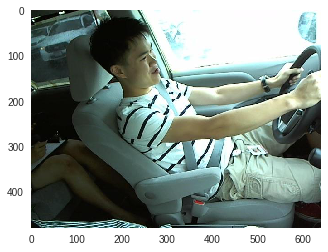

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline
example_img = plt.imread("/content/train/c0/img_44733.jpg")
plt.grid(False)
plt.imshow(example_img)

In [0]:
#Converting classname into category
df['classname'] = pd.factorize(df['classname'])[0]


In [11]:
#counting the number of instance of each class
count_class=df['classname'].value_counts() 
print(count_class)

0    2489
3    2346
4    2326
6    2325
2    2317
5    2312
1    2267
9    2129
7    2002
8    1911
Name: classname, dtype: int64


In [0]:
!ls

sample_data


In [0]:
# Lets copy all the training data in train set to one folder for easy processing
!cp -a /content/train/c0/. /content/combine_train/
!cp -a /content/train/c1/. /content/combine_train/
!cp -a /content/train/c2/. /content/combine_train/
!cp -a /content/train/c3/. /content/combine_train/
!cp -a /content/train/c4/. /content/combine_train/
!cp -a /content/train/c5/. /content/combine_train/
!cp -a /content/train/c6/. /content/combine_train/
!cp -a /content/train/c7/. /content/combine_train/
!cp -a /content/train/c8/. /content/combine_train/
!cp -a /content/train/c9/. /content/combine_train/

In [14]:
path, dirs, files = next(os.walk("/content/combine_train"))
file_count = len(files)
print(file_count) # confirming the number of file after copying

22424


In [0]:
import numpy as np
from skimage import io
from skimage.transform import resize
def convert_to_array(image):
  
  image_file = io.imread("/content/combine_train/"+str(image))
  image_resized = resize(image_file, (128, 128)) #resize the image to 128*128
  image_data = image_resized/ 255 # Normalize the image
  return image_data

In [18]:
i=0
X_train = np.ndarray(shape = (df.shape[0], 128, 128, 3), dtype = np.float32)
for fname in df["img"]:
  image_array = convert_to_array(fname)
  X_train[i,:,:,:] = image_array
  i +=1

print(X_train[1,:,:,:])
  
  

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


[[[2.40292196e-04 3.47943103e-04 2.24913500e-04]
  [2.30680511e-04 3.38331418e-04 2.15301814e-04]
  [2.74894264e-04 3.82545171e-04 2.59515567e-04]
  ...
  [3.86582082e-03 3.88312177e-03 3.90234520e-03]
  [3.92156886e-03 3.86005384e-03 3.92156886e-03]
  [3.89081123e-03 3.89081123e-03 3.89081123e-03]]

 [[2.30680511e-04 3.07574024e-04 1.99923103e-04]
  [2.63360242e-04 3.40253755e-04 2.32602848e-04]
  [2.67204916e-04 3.44098429e-04 2.36447522e-04]
  ...
  [3.45059601e-03 3.79661680e-03 3.76778166e-03]
  [3.84275289e-03 3.90618993e-03 3.92156886e-03]
  [3.90618993e-03 3.87543254e-03 3.89081123e-03]]

 [[2.74894264e-04 3.21030384e-04 2.13379462e-04]
  [3.32564407e-04 3.78700497e-04 2.71049590e-04]
  [2.74894264e-04 3.21030384e-04 2.13379462e-04]
  ...
  [3.21030384e-03 3.80430603e-03 3.78700509e-03]
  [3.78508260e-03 3.92156886e-03 3.92156886e-03]
  [3.92156886e-03 3.90618993e-03 3.87543254e-03]]

 ...

 [[1.38408301e-04 1.23029604e-04 9.22722029e-05]
  [1.48019986e-04 1.13417918e-04 1.5570

In [19]:
print(X_train[1,:,:,:].shape)

(128, 128, 3)


In [0]:
targets = np.array([[2, 3, 4, 0]])
print(type(targets))
print(targets)
print(targets.shape)
one_hot_targets = np.eye(6)[targets]
print(one_hot_targets)

<class 'numpy.ndarray'>
[[2 3 4 0]]
(1, 4)
[[[0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0.]
  [1. 0. 0. 0. 0. 0.]]]


In [20]:
import numpy as np
Y_train= df["classname"].values
one_hot_targets = np.eye(10)[Y_train]
print(one_hot_targets[1].shape)

(10,)


In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
#If you want to save image array as .h5 file for future use
'''import h5py
with h5py.File('/gdrive/My Drive/image_array.h5', 'r') as hf:
    data_train = hf['train_driver_dataset'][:]'''

In [0]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, one_hot_targets ,train_size = 0.4,test_size=0.2,random_state=42)

In [22]:
print("Training data shape",X_train.shape)
print("Training target shape",y_train.shape)
print("Testing data shape",X_test.shape)
print("Training test shape",y_test.shape)



Training data shape (8969, 128, 128, 3)
Training target shape (8969, 10)
Testing data shape (4485, 128, 128, 3)
Training test shape (4485, 10)


In [0]:
# Creating place holder
import tensorflow as tf
from tensorflow.python.framework import ops
import math
from cnn_utils import *

In [0]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_H0, n_W0, n_C0, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
        
    Returns:
    X -- placeholder for the data input, of shape [None, n_H0, n_W0, n_C0] and dtype "float"
    Y -- placeholder for the input labels, of shape [None, n_y] and dtype "float"
    """
    ### START CODE HERE ### (≈2 lines)
    X = tf.placeholder(tf.float32, shape=[None, n_H0, n_W0, n_C0],name="X_placeholder")
    Y = tf.placeholder(tf.float32, shape=[None, n_y],name="Y_placeholder")
    
    ### END CODE HERE ###
    
    return X, Y

In [26]:
X, Y = create_placeholders(64, 64, 3, 6)
print("X ="+ str(X))
print("Y ="+ str(Y))

X =Tensor("X_placeholder:0", shape=(?, 64, 64, 3), dtype=float32)
Y =Tensor("Y_placeholder:0", shape=(?, 6), dtype=float32)


In [0]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes weight parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [4, 4, 3, 8]
                        W2 : [2, 2, 8, 16]
    Returns:
    parameters -- a dictionary of tensors containing W1, W2
    """
    
    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 2 lines of code)
    
    W1 = tf.get_variable('W1', [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable('W2', [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    
    ## END CODE HERE ##
    parameters ={"W1": W1,
                  "W2": W2}
    return parameters

In [28]:
tf.reset_default_graph()
with tf.Session() as sees_test:
  
    parameters = initialize_parameters()
    init = tf.global_variables_initializer()
    sees_test.run(init)
    print("W1 = " + str(parameters["W1"].eval()[1,1,1]))
    print("W2 = " + str(parameters["W2"].eval()[1,1,1]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
W1 = [ 0.00131723  0.1417614  -0.04434952  0.09197326  0.14984085 -0.03514394
 -0.06847463  0.05245192]
W2 = [-0.08566415  0.17750949  0.11974221  0.16773748 -0.0830943  -0.08058
 -0.00577033 -0.14643836  0.24162132 -0.05857408 -0.19055021  0.1345228
 -0.22779644 -0.1601823  -0.16117483 -0.10286498]


In [0]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    
    Z1 = tf.nn.conv2d(X, W1, strides= [1,1,1,1], padding ="SAME")
    
    #Relu
    
    A1 = tf.nn.relu(Z1)
    
    # MAXPOOL: window 8x8, sride 8, padding 'SAME'
    
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding ="SAME")
    
    # CONV2D: filters W2, stride 1, padding 'SAME'
    
    Z2 = tf.nn.conv2d(P1, W2, strides =[1,1,1,1], padding ="SAME")
    
    #Relu
    A2 = tf.nn.relu(Z2)
    
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides=[1,4,4,1], padding="SAME")
    
    # FLATTEN
    
    P2 = tf.contrib.layers.flatten(P2)
    
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    
    Z3 = tf.contrib.layers.fully_connected(P2, 11, activation_fn= None)
    
    #END CODE HERE
    
    return Z3

In [30]:
tf.reset_default_graph()

with tf.Session() as sees:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sees.run(init)
    a = sees.run(Z3, {X: np.random.randn(2, 64, 64, 3)})
    print("Z3 =" + str(a))

Instructions for updating:
Use keras.layers.flatten instead.
Z3 =[[ 2.4164295  -1.1614199   0.981163    0.6824026  -0.05248657  0.7184313
   0.22008131  0.80433124  2.404187    1.7046089   0.45491973]
 [ 2.0366726  -0.92503506  1.1718057   0.4065038   0.138816    0.90338784
   0.07981753  0.5967737   1.9868093   2.1816905   0.11782407]]


In [0]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.nn.softmax_cross_entropy_with_logits(logits= Z3, labels = Y)
    cost = tf.reduce_mean(cost)
    ### END CODE HERE ###
    
    return cost
  

In [32]:
tf.reset_default_graph()

with tf.Session() as sees:
    np.random.seed(1)
    X, Y = create_placeholders(64, 64, 3, 11)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    init = tf.global_variables_initializer()
    sees.run(init)
    a = sees.run(cost, {X: np.random.randn(4,64,64,3), Y:np.random.randn(4,11)})
    print("Cost =", str(a))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost = 1.1419544


In [0]:

def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.009,
          num_epochs = 100, minibatch_size = 64, print_cost = True):
    """
    Implements a three-layer ConvNet in Tensorflow:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Arguments:
    X_train -- training set, of shape (None, 64, 64, 3)
    Y_train -- test set, of shape (None, n_y = 6)
    X_test -- training set, of shape (None, 64, 64, 3)
    Y_test -- test set, of shape (None, n_y = 6)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    train_accuracy -- real number, accuracy on the train set (X_train)
    test_accuracy -- real number, testing accuracy on the test set (X_test)
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep results consistent (tensorflow seed)
    seed = 3                                          # to keep results consistent (numpy seed)
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of the correct shape
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer that minimizes the cost.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables globally
    init = tf.global_variables_initializer()
    
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
     
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the optimizer and the cost, the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                minibatch_cost += temp_cost / num_minibatches
                

            # Print the cost every epoch
            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        
        #First try to bring out this
        predict_op = tf.argmax(Z3, 1,name="Prediction")
        save_path = saver.save(sess, "/gdrive/My Drive/new_driver_state.ckpt")
        print("Model saved in file: %s" % save_path)
        correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print(accuracy)
        train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        test_accuracy = accuracy.eval({X: X_test, Y: Y_test})
        print("Train Accuracy:", train_accuracy)
        print("Test Accuracy:", test_accuracy)
                
        return train_accuracy, test_accuracy, parameters

    


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Cost after epoch 0: 2.196474
Cost after epoch 5: 0.720671
Cost after epoch 10: 0.410561
Cost after epoch 15: 0.296159
Cost after epoch 20: 0.224600
Cost after epoch 25: 0.186237
Cost after epoch 30: 0.169118
Cost after epoch 35: 0.141057
Cost after epoch 40: 0.132121
Cost after epoch 45: 0.114623
Cost after epoch 50: 0.086894
Cost after epoch 55: 0.083453
Cost after epoch 60: 0.068118
Cost after epoch 65: 0.066109
Cost after epoch 70: 0

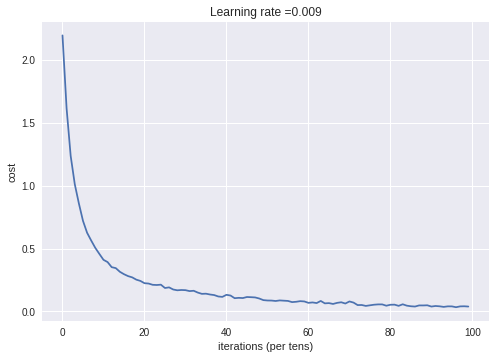

Model saved in file: /gdrive/My Drive/new_driver_state.ckpt
Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.988293
Test Accuracy: 0.94158304


In [0]:
_, _, parameters = model(X_train, y_train, X_test, y_test)